
Example data is licensed by Robert Haase;  Akanskha Jain;  Stéphane Rigaud;  Daniela Vorkel;  Pradeep Rajasekhar;  Theresa Suckert;  Talley J. Lambert;  Juan Nunez-Iglesias;  Daniel P. Poole;  Pavel Tomancak and Eugene W. Myers under the [CC-BY 4.0 license](https://creativecommons.org/licenses/by/4.0/legalcode)
 
https://zenodo.org/record/4276076#.YNclwOgzZaQ


In [12]:
voxel_size = [2, 0.6934, 0.6934]
filename = "Lund_20h.tif"

In [13]:
import numpy as np
import pyclesperanto_prototype as cle
from skimage.io import imsave, imread
import matplotlib.pyplot as plt

cle.select_device("RTX")

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (2 refs)>

(70, 1024, 512)


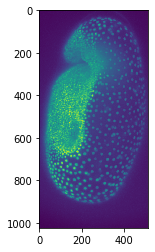

In [14]:
original_image = cle.push(imread(filename))
print(original_image.shape)
cle.imshow(original_image)

(140, 710, 355)


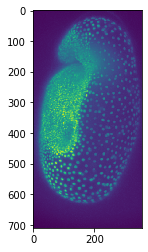

In [15]:
isotropic_image = cle.create([int(a * b) for a, b in zip(original_image.shape, voxel_size)])

cle.scale(original_image, isotropic_image, factor_x=voxel_size[2], factor_y=voxel_size[1], factor_z=voxel_size[0])

print(isotropic_image.shape)
cle.imshow(isotropic_image)

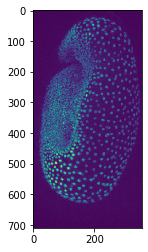

In [16]:
background_subtracted_image = cle.top_hat_box(isotropic_image, radius_x=4, radius_y=4, radius_z=4)

cle.imshow(background_subtracted_image)

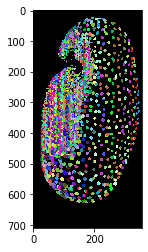

In [17]:

labels = cle.voronoi_otsu_labeling(background_subtracted_image, spot_sigma=0.5, outline_sigma=1)

cle.imshow(labels, labels=True)

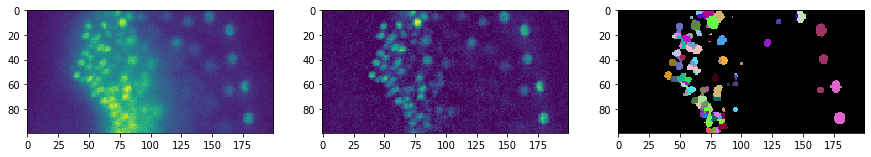

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(15, 15))
kwargs = {'start_x':100,'width':200, 'start_y':100, 'height':100, 'start_z':70, 'depth':1}
cle.imshow(cle.crop(isotropic_image, **kwargs), plot=axs[0])
cle.imshow(cle.crop(background_subtracted_image, **kwargs), plot=axs[1])
cle.imshow(cle.crop(labels, **kwargs), plot=axs[2], labels=True)

In [19]:
imsave("lund_labels.tif", np.asarray(labels))

<ipython-input-19-76e89ed19524>:1: UserWarning: lund_labels.tif is a low contrast image
  imsave("lund_labels.tif", np.asarray(labels))


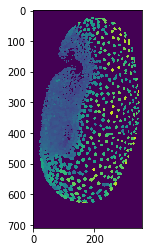

In [20]:
parametric_map = cle.average_distance_of_n_closest_neighbors_map(labels, n=6)

cle.imshow(parametric_map)

In [21]:
imsave("lund_parametric_map.tif", np.asarray(parametric_map))